# Introduction

__Libraries__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

<h2>Loading Dataset</h2>

In [2]:
#train
train=pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#test
test=pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2>Preprocessing</h2>

In [4]:
#to put labels in y_train
y_train=train["label"]
#to drop labels from x_train
x_train=train.drop(labels=["label"],axis=1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

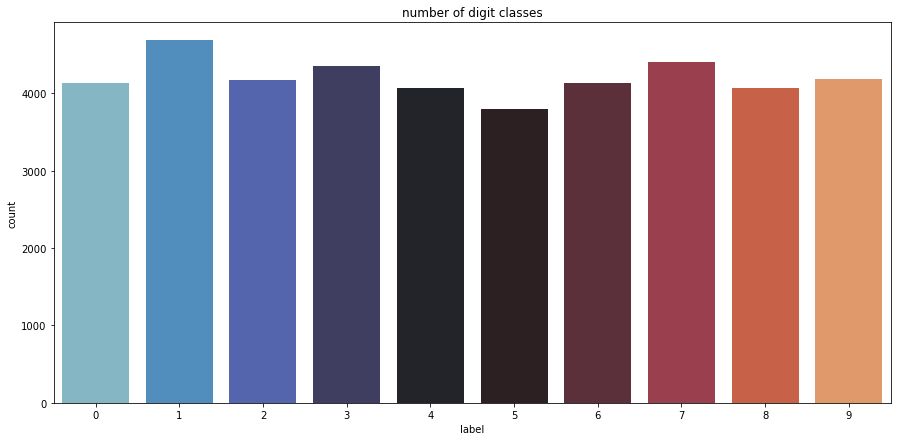

In [5]:
#visualization
plt.figure(figsize=(15,7))
g=sns.countplot(y_train,palette='icefire')
plt.title('number of digit classes')
y_train.value_counts()

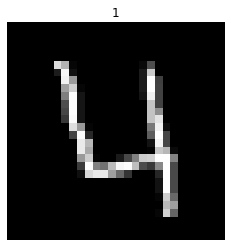

In [6]:
#visualization of a random sample(3rd index)
img=x_train.iloc[3].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

<h3>Normalization</h3>

- Grayscale Normalization for reducing the effect of illumination differences
- Normalization helps CNN work faster.

In [7]:
x_train=x_train/255.0
test=test/255.0
print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


<h3>Reshape</h3>

- Train and test images (28x28)
- Reshape all data to 28x28x1 3D matrices (1 is for grayscaled)
- Keras needs an extra dimension in the end which corresponds to channels. Grayscaled images uses only one channel.

In [8]:
x_train=x_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
print("x_train shape: ",x_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


 <h3>Label Encoding</h3>

- Encode labels to one hot vectors (one hot encoding)
- 2 => [0,0,1,0,0,0,0,0,0]
- 4 => [0,0,0,0,1,0,0,0,0]

In [9]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train,num_classes=10)

<h3>Train Test Split</h3>

- Test size is 10%
- Train size is 90%

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=2)
print("x_train shape: ",x_train.shape)
print("x_validation shape: ",x_val.shape)
print("y_train shape: ",y_train.shape)
print("y_validation shape: ",y_val.shape)

x_train shape:  (37800, 28, 28, 1)
x_validation shape:  (4200, 28, 28, 1)
y_train shape:  (37800, 10)
y_validation shape:  (4200, 10)


# Convolutional Neural Network

- Used for image classification and object detection
- 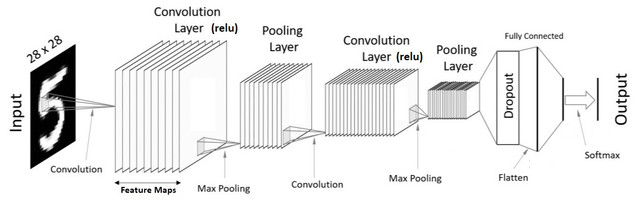

<h3>Convolution Operation</h3>

- Feature Detector = kernel = filter detects the features. (edges or convex shapes)
- Feature Map = conv(input image, feature detector). Element wise multiplication matrices.
- Feature Map = Convolved Feature
- Stride = Navigating in input image
- To run faster, reduce the size of image. However, this causes information loss.
- Create multiple feature maps by using multiple feature detectors.
- 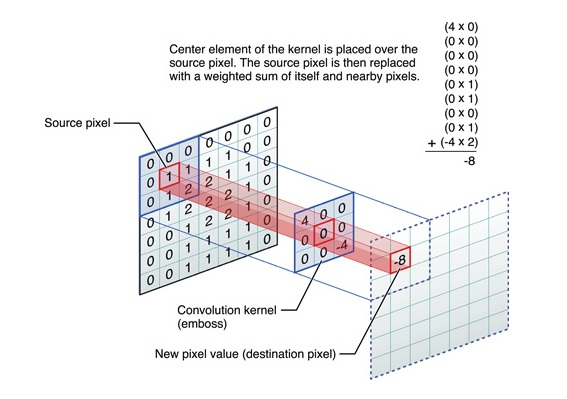

- After Having convolution layer, RelU func. to break up linearity.
- 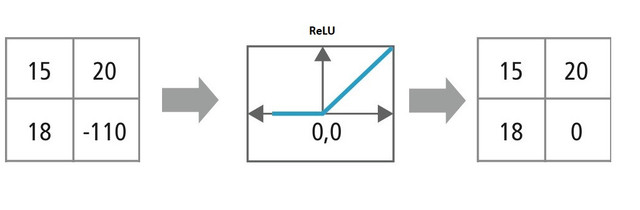

<h3>Same Padding</h3>

- Size of the image decreases after convolution operation.
- To prevent that data loss, same padding can be use.

- 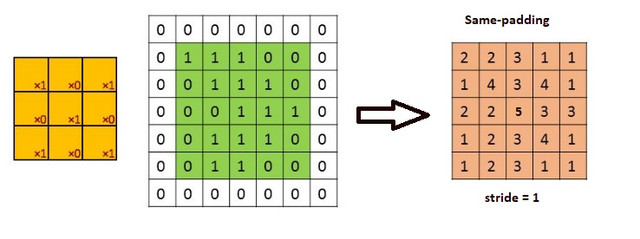

<h3>Max Pooling</h3>

- Max pooling makes down-sampling or sub-sampling.
- Makes the detection of features invariant to scale or orientation changes.
- Reduces the amount of parameters and computation in the network. Hence, it controls overfitting.

- 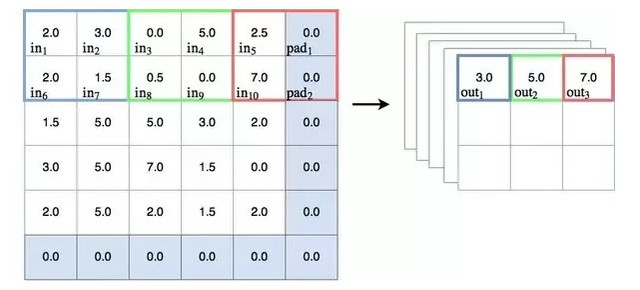

<h3>Flattening</h3>

- 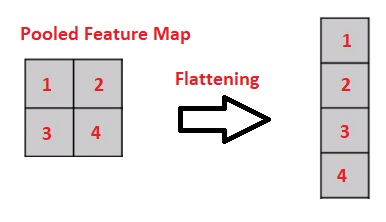

<h3>Full Connection</h3>

- Neurons in a fully connected layer have connections to all activations in the previous layer.
- It is ANN

- 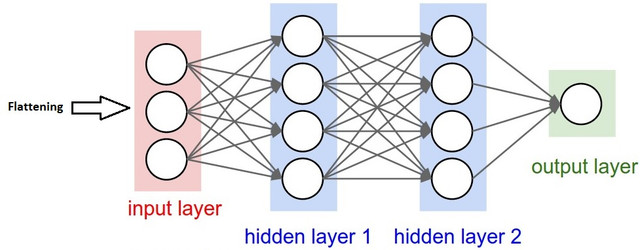

<h3>CNN Implementing with Keras</h3>

<h4>Creating Model</h4>

- conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
- Dropout: is a technique where randomlu selected neurons are ignored during training

- 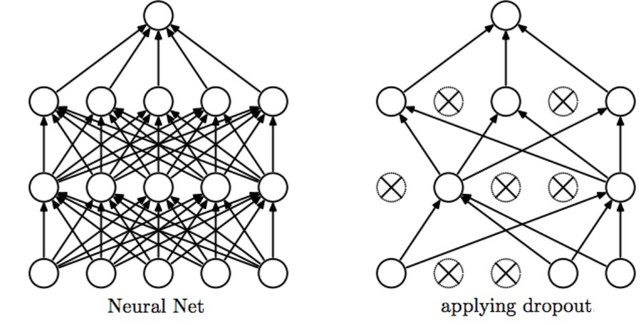

In [11]:
#libraries
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical# to convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
#Model
model=Sequential()
#first layer
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#second layer
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

<h4>Defining Optimizer</h4>

- Adam(adaptive momentum) Optimizer for changing the learning rate.

In [12]:
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

<h4>Compiling the Model</h4>

- To compile, we use Categorical Crossentropy for multiclass.

- 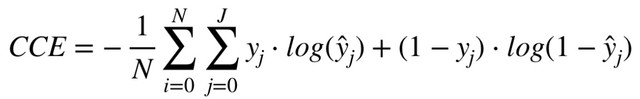

In [13]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=["accuracy"])

<h4>Epochs and Batch Size</h4>

- Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs. Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch.

In [14]:
epochs=35 #increase for better results
batch_size=250

<h4>Data Augmentation</h4>

- To avoid overfitting, we need to expand artificially out dataset.
- Alter the training data vwith small transformations to reproduce the variations of digit.

- 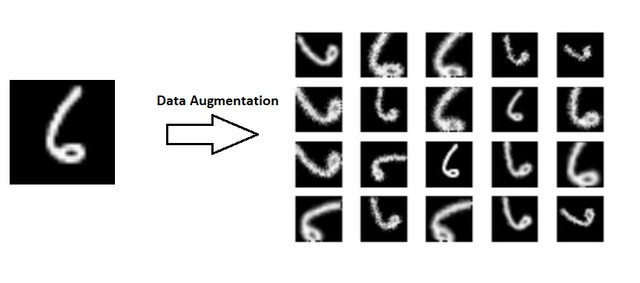

In [15]:
datagen=ImageDataGenerator(featurewise_center=False,#set input mean to 0
                          samplewise_center=False,#set each sample mean to 0
                          featurewise_std_normalization=False,#divide inputs by std of the dataset
                          samplewise_std_normalization=False,#divide each input by its std
                          zca_whitening=False,#dimension reduction
                          rotation_range=0.5,#randomly rotate images in the range 15 degrees
                          zoom_range=0.5,#randomly zoom image 15%
                          width_shift_range=0.5,#randomly shift image horizontally 15%
                          height_shift_range=0.5,#randomly shift image vertically 15%
                          horizontal_flip=False,#randomly flip images horizontally
                          vertical_flip=False)#randomly flip images vertically
datagen.fit(x_train)

<h4>Fitting the Model</h4>

In [16]:
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                           epochs=epochs,validation_data=(x_val,y_val), steps_per_epoch=x_train.shape[0]//batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/35
151/151 [==============================] - 10s 67ms/step - loss: 2.1792 - accuracy: 0.1929 - val_loss: 1.7530 - val_accuracy: 0.4419
Epoch 2/35
151/151 [==============================] - 10s 68ms/step - loss: 1.8806 - accuracy: 0.3308 - val_loss: 1.1326 - val_accuracy: 0.6812
Epoch 3/35
151/151 [==============================] - 11s 72ms/step - loss: 1.7010 - accuracy: 0.4085 - val_loss: 0.7989 - val_accuracy: 0.7926
Epoch 4/35
151/151 [==============================] - 11s 71ms/step - loss: 1.5980 - accuracy: 0.4510 - val_loss: 0.6082 - val_accuracy: 0.8593
Epoch 5/35
151/151 [==============================] - 10s 68ms/step - loss: 1.5287 - accuracy: 0.4773 - val_loss: 0.5081 - val_accuracy: 0.8843
Epoch 6/35
151/151 [==============================] - 11s 70ms/step - loss: 1.4771 - accuracy: 0.4970 - val_loss: 0.4411 - val_accuracy: 0.8993
Epoch 7/35
151/151 [==============================] - 10s 67

# Conclusion

<h2>Visualization of the Results</h2>

<h4>Validation Loss</h4>

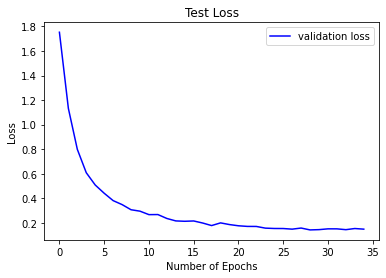

In [17]:
plt.plot(history.history['val_loss'],color='b',label='validation loss')
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

<h4>Confusion Matrix</h4>

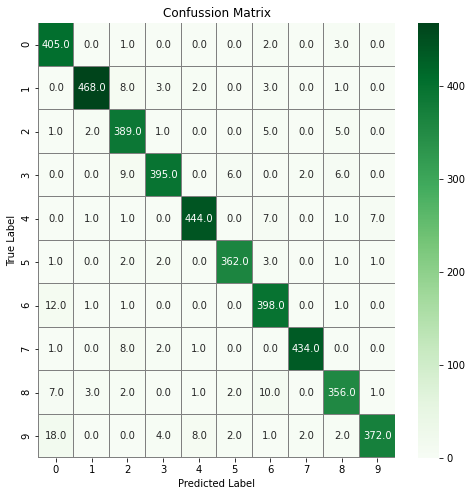

In [18]:
import seaborn as sns
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
confusion_mtx=confusion_matrix(y_true,y_pred_classes)
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx,annot=True,linewidths=0.01,cmap="Greens",linecolor="gray",fmt=".1f",ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confussion Matrix")
plt.show()

# References

- https://www.kaggle.com/kanncaa1/convolutional-neural-network-cnn-tutorial/data
- https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks
- https://www.kaggle.com/c/digit-recognizer/data